# Inset Map of Kotlin Island

Kotlin island is situated in the Gulf of Finland and is one of the districts of the city of Saint Petersburg in Russia.

This example shows how *Lets-Plot* *GeoPandas* integration can help to build an inset map of Kotlin island.

<em><sub>This page is available as an executable or viewable <strong>Jupyter Notebook</strong>:</sub></em>
<br/><br/>
<a href="https://mybinder.org/v2/gh/JetBrains/lets-plot/v1.5.3demos1?filepath=docs%2Fexamples%2Fjupyter-notebooks%2Fgeopandas_kotlin_isl.ipynb"
   target="_parent"> 
   <img align="left" 
        src="https://mybinder.org/badge_logo.svg">
</a>
<a href="https://nbviewer.jupyter.org/github/JetBrains/lets-plot/blob/master/docs/examples/jupyter-notebooks/geopandas_kotlin_isl.ipynb" 
   target="_parent"> 
   <img align="right" 
        src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.png" 
        width="109" height="20">
</a>
<br/>
<br/>

[The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL)](https://www.openstreetmap.org/copyright).


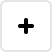
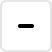
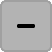
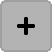
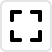
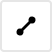
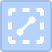

In [1]:
import requests
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, shape, box

from lets_plot import *
LetsPlot.setup_html()

In [2]:
def osm_boundaries(osm_id):
    requests.get('http://polygons.openstreetmap.fr/?id={0}'.format(osm_id))
    response = requests.get('http://polygons.openstreetmap.fr/get_geojson.py?id={0}&params=0'.format(osm_id))
    return gpd.GeoDataFrame(geometry=[ shape(response.json()['geometries'][0]) ])

### Load boundaries of St.-Petersburg districts from OSM to GeoPandas *GeoDataFrame*.

In [3]:
spb_districts_ids = [1115082, 1114193, 1114252, 1114354, 1114806, 1114809, 337424, 1114895, 363103, 1115366, 338636, 368287, 1114905, 367375, 1115367, 338635, 369514, 1114902]
spb_gdf = pd.concat([osm_boundaries(osm_id) for osm_id in spb_districts_ids])

### Create a map showing all the districts of St.-Petersburg. 

This map will become an **inset map**. The red rectangle indicates the bounds of the future **main map**.

In [4]:
kotlin_bbox = [29.63, 59.965, 29.815, 60.035]
kotlin_rect = dict(zip(['xmin', 'ymin', 'xmax', 'ymax'], kotlin_bbox))

In [5]:
spb_plot = ggplot() + \
    geom_rect(map=gpd.GeoDataFrame(geometry=[box(*spb_gdf.geometry.total_bounds)]), color='black', fill='white') + \
    geom_polygon(map=spb_gdf, color='#a1d99b', fill='#f7fcf5') + \
    geom_rect(**kotlin_rect, color='red', alpha=0) + \
    geom_text(label='Saint Petersburg', x=30.334445, y=59.934294, color='black', size=6) + \
    theme(legend_position='none', axis_title='blank', axis_text='blank', axis_ticks='blank', axis_line='blank')
spb_plot

### Create the main map with only Kotlin island on it.

We use `xlim` and `ylim` parameters of the coordinate system to crop the entire map containing all the districts of St.-Petersburg.


In [6]:
# GeoDataFrame containing names and coordinates of some tourist attractions to show on the main map.
places_gdf = gpd.GeoDataFrame({
    'name' : [
        'Kronstadt Naval Cathedral',
        'Kronstadt History Museum',
        'Kronstadt Naval Museum',
        'City Russian Cemetery',
        'Kronstadt Lutheran Cemetery',
        'Vladimir Church',
    ],
    'type' : ['church', 'museum', 'museum', 'cemetery', 'cemetery', 'church'],
    'geometry' : [
        Point(29.777455, 59.991744),
        Point(29.791317, 59.986777),
        Point(29.763422, 59.996108),
        Point(29.706130, 60.019788),
        Point(29.749861, 60.002212),
        Point(29.766254, 59.998515),
    ],
})

In [7]:
# Cut-out the Kotlin area and add layes with text and points of interest.
kotlin_plot = ggplot() + \
    geom_rect(**kotlin_rect, fill='#aadaff', alpha=0.2) + \
    geom_polygon(map=spb_gdf, color='#31a354', fill='#e5f5e0') + \
    geom_point(aes(color='type', shape='type'), data=places_gdf, size=5) + \
    geom_text(aes(label='name'), data=places_gdf, hjust='right', position=position_nudge(x=-.002)) + \
    geom_text(label='Kotlin Isl.', x=29.725, y=60.011, color='#31a354', size=13, fontface='italic') + \
    geom_text(label='Gulf of Finland', x=29.665, y=60.002, color='#578bcc', size=11, fontface='italic') + \
    coord_cartesian(xlim=kotlin_bbox[0::2], ylim=kotlin_bbox[1::2]) + \
    ggtitle('Tourist attractions on Kotlin island') + \
    theme(legend_position=(0.2, 0.2), axis_title='blank', axis_text='blank', axis_ticks='blank', axis_line='blank')
kotlin_plot

### Finally, use *GGBunch* to show these two maps together.

In [8]:
bunch = GGBunch()
bunch.add_plot(kotlin_plot, 0, 0, 800, 600)
bunch.add_plot(spb_plot, 600, 25, 200, 150)
bunch